In [153]:
import pandas as pd
import numpy as np
from datetime import datetime

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt

%matplotlib inline

In [154]:
links = pd.read_csv('../001-intro/links.csv')
movies = pd.read_csv('../001-intro/movies.csv')
ratings = pd.read_csv('../001-intro/ratings.csv')
tags = pd.read_csv('../001-intro/tags.csv')

In [155]:
tags.head()

userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

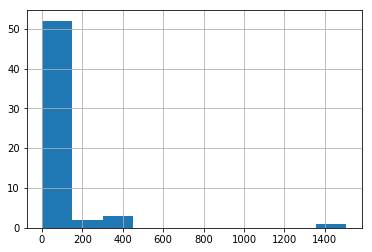

In [156]:
tags.groupby(['userId']).tag.count().hist()

In [14]:
tags.groupby(['userId']).tag.count().median()

4.0

In [15]:
tags.groupby(['userId']).tag.count().mean()

63.5

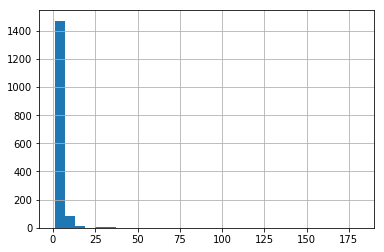

In [17]:
tags.groupby(['movieId']).tag.count().hist(bins=30)

In [18]:
tags.groupby(['movieId']).tag.count().max()

181

In [21]:
tags.groupby(['movieId']).tag.count().mean()

2.3428753180661577

In [22]:
tags.groupby(['movieId']).tag.count().median()

1.0

In [29]:
yearmonth = []
for t in tags.timestamp:
    d = datetime.fromtimestamp(t)
    yearmonth.append(str(d.year)+"-{:02d}".format(d.month))

In [31]:
tags['yearmonth'] = yearmonth

In [32]:
tags.head()

userId  movieId              tag   timestamp yearmonth
0       2    60756            funny  1445714994   2015-10
1       2    60756  Highly quotable  1445714996   2015-10
2       2    60756     will ferrell  1445714992   2015-10
3       2    89774     Boxing story  1445715207   2015-10
4       2    89774              MMA  1445715200   2015-10

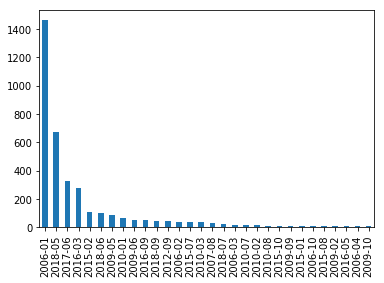

In [33]:
tags.yearmonth.value_counts()[:30].plot.bar()

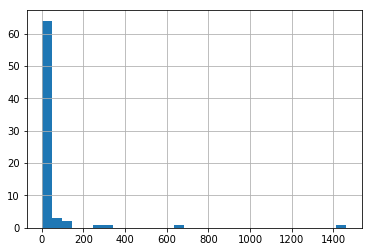

In [36]:
tags.groupby('yearmonth').tag.count().hist(bins=30)

In [37]:
tags.groupby('yearmonth').tag.count().mean()

50.45205479452055

In [38]:
tags.groupby('yearmonth').tag.count().median()

5.0

In [41]:
genres_on_movie = [len(q.split('|')) for q in movies.genres]

(array([2.851e+03, 0.000e+00, 0.000e+00, 3.218e+03, 0.000e+00, 0.000e+00,
        2.338e+03, 0.000e+00, 0.000e+00, 0.000e+00, 9.870e+02, 0.000e+00,
        0.000e+00, 2.710e+02, 0.000e+00, 0.000e+00, 6.300e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 1.200e+01, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ,
         4.3,  4.6,  4.9,  5.2,  5.5,  5.8,  6.1,  6.4,  6.7,  7. ,  7.3,
         7.6,  7.9,  8.2,  8.5,  8.8,  9.1,  9.4,  9.7, 10. ]),
 <a list of 30 Patch objects>)

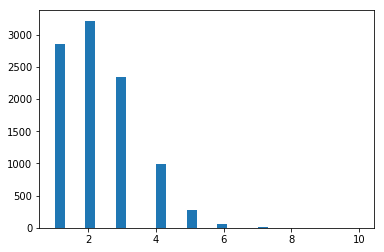

In [45]:
plt.hist(genres_on_movie, bins=30)

In [43]:
np.mean(genres_on_movie)

2.2668856497639087

In [46]:
np.median(genres_on_movie)

2.0

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, stop_words='english',norm = None)

In [121]:
genres_on_movie = [q.replace('|', ' ') for q in movies.genres]

In [122]:
X = vectorizer.fit_transform(genres_on_movie)

In [123]:
X_vovab = vectorizer.get_feature_names()

In [124]:
X_vovab

['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'fi',
 'film',
 'genres',
 'horror',
 'imax',
 'listed',
 'musical',
 'mystery',
 'noir',
 'romance',
 'sci',
 'thriller',
 'war',
 'western']

In [125]:
X_mat = X.todense()

In [126]:
X_mat

matrix([[0.        , 3.04226778, 3.76757207, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 3.04226778, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [2.67277971, 0.        , 3.76757207, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [127]:
df = pd.concat([movies, pd.DataFrame(X_mat)], axis=1)

In [128]:
df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres    0         1         2  \
0  Adventure|Animation|Children|Comedy|Fantasy  0.0  3.042268  3.767572   
1                   Adventure|Children|Fantasy  0.0  3.042268  0.000000   
2                               Comedy|Romance  0.0  0.000000  0.000000   
3                         Comedy|Drama|Romance  0.0  0.000000  0.000000   
4                                       Comedy  0.0  0.000000  0.000000   

          3         4    5    6  ...   13   14   15   16   17        18   19  \
0  3.684517  1.952928  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
1  3.684517  0.000000  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
2  0.000000  1.952928  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2.808422  0.0   
3  0.000000  1.952928  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2.808422  0.0   
4  0.000000  1.952928  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   

    20   21   22  
0  0.0  0.0  0.0  
1  0.0  0.0  0.0  
2  0.0  0.0  0.0  
3  0.0  0.0  0.0  
4  0.0  0.0  0.0  

[5 rows x 26 columns]

In [129]:
df.columns = ['movieId', 'title', 'genres', 'action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres', 'horror', 'imax', 'listed', 'musical', 'mystery', 'noir', 'romance', 'sci', 'thriller', 'war', 'western']

In [130]:
df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  action  adventure  animation  \
0  Adventure|Animation|Children|Comedy|Fantasy     0.0   3.042268   3.767572   
1                   Adventure|Children|Fantasy     0.0   3.042268   0.000000   
2                               Comedy|Romance     0.0   0.000000   0.000000   
3                         Comedy|Drama|Romance     0.0   0.000000   0.000000   
4                                       Comedy     0.0   0.000000   0.000000   

   children    comedy  crime  documentary  ...  imax  listed  musical  \
0  3.684517  1.952928    0.0          0.0  ...   0.0     0.0      0.0   
1  3.684517  0.000000    0.0          0.0  ...   0.0     0.0      0.0   
2  0.000000  1.952928    0.0          0.0  ...   0.0     0.0      0.0   
3  0.000000  1.952928    0.0          0.0  ...   0.0     0.0      0.0   
4  0.000000  1.952928    0.0          0.0  ...   0.0     0.0      0.0   

   mystery  noir   romance  sci  thriller  war  western  
0      0.0   0.0  0.000000  0.0       0.0  0.0      0.0  
1      0.0   0.0  0.000000  0.0       0.0  0.0      0.0  
2      0.0   0.0  2.808422  0.0       0.0  0.0      0.0  
3      0.0   0.0  2.808422  0.0       0.0  0.0      0.0  
4      0.0   0.0  0.000000  0.0       0.0  0.0      0.0  

[5 rows x 26 columns]

In [131]:
df1 = df[['movieId', 'action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres', 'horror', 'imax', 'listed', 'musical', 'mystery', 'noir', 'romance', 'sci', 'thriller', 'war', 'western']]

In [132]:
df1.head()

movieId  action  adventure  animation  children    comedy  crime  \
0        1     0.0   3.042268   3.767572  3.684517  1.952928    0.0   
1        2     0.0   3.042268   0.000000  3.684517  0.000000    0.0   
2        3     0.0   0.000000   0.000000  0.000000  1.952928    0.0   
3        4     0.0   0.000000   0.000000  0.000000  1.952928    0.0   
4        5     0.0   0.000000   0.000000  0.000000  1.952928    0.0   

   documentary     drama  fantasy  ...  imax  listed musical  mystery  noir  \
0          0.0  0.000000  3.52501  ...   0.0     0.0     0.0      0.0   0.0   
1          0.0  0.000000  3.52501  ...   0.0     0.0     0.0      0.0   0.0   
2          0.0  0.000000  0.00000  ...   0.0     0.0     0.0      0.0   0.0   
3          0.0  1.803618  0.00000  ...   0.0     0.0     0.0      0.0   0.0   
4          0.0  0.000000  0.00000  ...   0.0     0.0     0.0      0.0   0.0   

    romance  sci  thriller  war  western  
0  0.000000  0.0       0.0  0.0      0.0  
1  0.000000  0.0       0.0  0.0      0.0  
2  2.808422  0.0       0.0  0.0      0.0  
3  2.808422  0.0       0.0  0.0      0.0  
4  0.000000  0.0       0.0  0.0      0.0  

[5 rows x 25 columns]

In [133]:
from sklearn.neighbors import NearestNeighbors

In [134]:
nb = NearestNeighbors(n_neighbors=7, n_jobs=1, metric='euclidean')

In [135]:
nb.fit(X_mat)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=1, n_neighbors=7, p=2, radius=1.0)

In [136]:
test = ['adventure comedy fantasy crime']

In [137]:
X_test = vectorizer.transform(test)

In [138]:
X_mat_test = X_test.todense()

In [139]:
X_mat_test

matrix([[0.        , 3.04226778, 0.        , 0.        , 1.95292831,
         3.09422752, 0.        , 0.        , 3.52501044, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ]])

In [141]:
res = nb.kneighbors(X_mat_test, return_distance=True)

In [142]:
res

(array([[2.67277971, 3.04226778, 3.09422752, 3.09422752, 3.09422752,
         3.09422752, 3.09422752]]),
 array([[6774, 9096, 2302, 3376,  863, 3302, 2608]], dtype=int64))

In [143]:
movies.iloc[res[1][0]]

movieId                                       title  \
6774    60074                              Hancock (2008)   
9096   143559                         L.A. Slasher (2015)   
2302     3052                                Dogma (1999)   
3376     4591                      Erik the Viking (1989)   
863      1136      Monty Python and the Holy Grail (1975)   
3302     4467  Adventures of Baron Munchausen, The (1988)   
2608     3489                                 Hook (1991)   

                                     genres  
6774  Action|Adventure|Comedy|Crime|Fantasy  
9096                   Comedy|Crime|Fantasy  
2302               Adventure|Comedy|Fantasy  
3376               Adventure|Comedy|Fantasy  
863                Adventure|Comedy|Fantasy  
3302               Adventure|Comedy|Fantasy  
2608               Adventure|Comedy|Fantasy

In [144]:
tags.head()

userId  movieId              tag   timestamp yearmonth
0       2    60756            funny  1445714994   2015-10
1       2    60756  Highly quotable  1445714996   2015-10
2       2    60756     will ferrell  1445714992   2015-10
3       2    89774     Boxing story  1445715207   2015-10
4       2    89774              MMA  1445715200   2015-10

In [152]:
tags.groupby('movieId')

In [145]:
tagss = []
moviess = []
for movie, group in tags.groupby('movieId')[:10]:
    print(movie, group)

TypeError: unhashable type: 'slice'